In [149]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Activity

Do clustering with the iris flower dataset to form clusters using as features petal width and length. Drop out the other two features (sepal width and length) for simplicity.


Do clustering with the iris flower dataset to form clusters using as features sepal width and length. Drop out the other two features (petal width and length) for simplicity.


Do clustering with the iris flower dataset to form clusters using as features sepal and petal width and length. Notice that scatter plots here are not possible


For the previous cases:
With and without using min max scaling: determine whether the scaling benefits or not
Compute and show the elbow plot


Draw conclusiones:
About the scalling: does it helps or not?
About the elbow plot: does the K agree with the real number of clusters?
Comparison between (i) sepal features alone, (ii) petal features alone, and (ii) both sepal with petal features: which one is better/worse? Why?

In [150]:
# url string that hosts our .csv file
url = "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
dataset = pd.read_csv(url)
dataset1 = pd.read_csv(url)
dataset2 = pd.read_csv(url)


In [151]:
print(dataset.shape)

dataset.head()


(150, 5)


,sepallength,sepalwidth,petallength,petalwidth,nombre
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [152]:
dataset = dataset .dropna()

print(dataset.shape)

(150, 5)


In [153]:
# Encoding the categorical column
dataset = dataset.replace({"nombre":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })
dataset1 = dataset.replace({"nombre":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })
dataset2 = dataset.replace({"nombre":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

dataset

,sepallength,sepalwidth,petallength,petalwidth,nombre
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Inicio de Punto 1 (Sepal)

In [154]:
# Drop out non necesary columns
dataset.drop(['sepallength', 'sepalwidth'],axis='columns',inplace=True)

#Visualize the dataset
dataset


,petallength,petalwidth,nombre
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


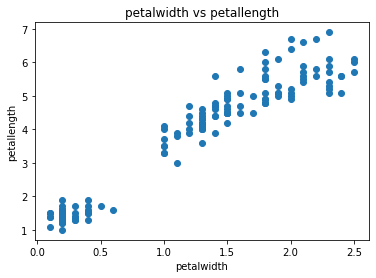

In [155]:
plt.scatter(dataset.petalwidth,dataset.petallength)
plt.title('petalwidth vs petallength')
plt.xlabel('petalwidth')
plt.ylabel('petallength')
plt.show()

<ipython-input-156-9f062dd0bd27>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df0.petalwidth, df0.petallength, Label='Iris-setosa')
<ipython-input-156-9f062dd0bd27>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.petalwidth, df1.petallength, Label='Iris-versicolor')
<ipython-input-156-9f062dd0bd27>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.petalwidth, df2.petallength, Label='Iris-virginica')


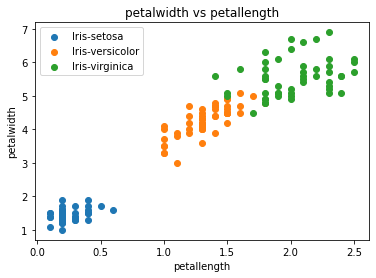

In [156]:
df0 = dataset[dataset.nombre==0]
df1 = dataset[dataset.nombre==1]
df2 = dataset[dataset.nombre==2]

plt.scatter(df0.petalwidth, df0.petallength, Label='Iris-setosa')
plt.scatter(df1.petalwidth, df1.petallength, Label='Iris-versicolor')
plt.scatter(df2.petalwidth, df2.petallength, Label='Iris-virginica')

plt.title('petalwidth vs petallength')
plt.xlabel('petallength')
plt.ylabel('petalwidth')
plt.legend()
plt.show()

In [157]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset[['petalwidth','petallength']])

# Print estimated cluster of each point in the dataser
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [158]:
# Add a new column to the dataset with the cluster information
dataset['Cluster1'] = yp

dataset

,petallength,petalwidth,nombre,Cluster1
0,1.4,0.2,0,1
1,1.4,0.2,0,1
2,1.3,0.2,0,1
3,1.5,0.2,0,1
4,1.4,0.2,0,1
...,...,...,...,...
145,5.2,2.3,2,0
146,5.0,1.9,2,0
147,5.2,2.0,2,0
148,5.4,2.3,2,0


In [159]:
dataset.Cluster1.unique()

array([1, 2, 0])

In [160]:
# ...
km.cluster_centers_

array([[2.0375    , 5.59583333],
       [0.246     , 1.462     ],
       [1.34230769, 4.26923077]])

In [161]:
# ...
km.inertia_

31.371358974358966

<ipython-input-162-c45c9af1f916>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df0.petalwidth, df0.petallength, Label='Iris-setosa')
<ipython-input-162-c45c9af1f916>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.petalwidth, df1.petallength, Label='Iris-versicolor')
<ipython-input-162-c45c9af1f916>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.petalwidth, df2.petallength, Label='Iris-virginica')


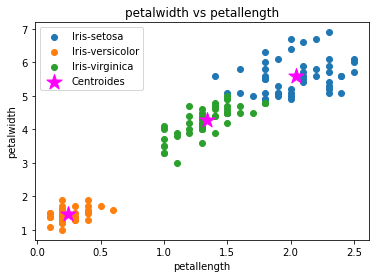

In [162]:
#Resultado de Cluster 1

df0 = dataset[dataset.Cluster1==0]
df1 = dataset[dataset.Cluster1==1]
df2 = dataset[dataset.Cluster1==2]

plt.scatter(df0.petalwidth, df0.petallength, Label='Iris-setosa')
plt.scatter(df1.petalwidth, df1.petallength, Label='Iris-versicolor')
plt.scatter(df2.petalwidth, df2.petallength, Label='Iris-virginica')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('petalwidth vs petallength')
plt.xlabel('petallength')
plt.ylabel('petalwidth')
plt.legend()
plt.show()

# Normalizing the data: preprocessing using min max scaler Petalwifth vs Petallength

Normalizing the data: preprocessing using min max scaler

In [163]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(dataset[['petallength']])
dataset['petallength'] = scaler.transform(dataset[['petallength']])

scaler.fit(dataset[['petalwidth']])
dataset['petalwidth'] = scaler.transform(dataset[['petalwidth']])

dataset

,petallength,petalwidth,nombre,Cluster1
0,0.067797,0.041667,0,1
1,0.067797,0.041667,0,1
2,0.050847,0.041667,0,1
3,0.084746,0.041667,0,1
4,0.067797,0.041667,0,1
...,...,...,...,...
145,0.711864,0.916667,2,0
146,0.677966,0.750000,2,0
147,0.711864,0.791667,2,0
148,0.745763,0.916667,2,0


In [164]:
dataset.describe()

,petallength,petalwidth,nombre,Cluster1
count,150.000000,150.000000,150.000000,150.000000
mean,0.467458,0.458056,1.000000,1.026667
std,0.299203,0.317599,0.819232,0.818795
min,0.000000,0.000000,0.000000,0.000000
25%,0.101695,0.083333,0.000000,0.000000
50%,0.567797,0.500000,1.000000,1.000000
75%,0.694915,0.708333,2.000000,2.000000
max,1.000000,1.000000,2.000000,2.000000


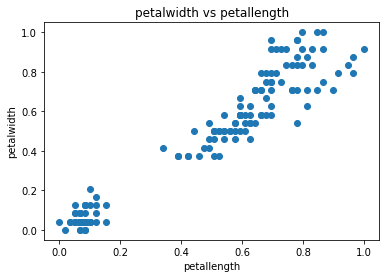

In [165]:
plt.scatter(dataset.petallength,dataset.petalwidth)
plt.title('petalwidth vs petallength')
plt.xlabel('petallength')
plt.ylabel('petalwidth')
plt.show()

In [166]:
# Initialize model and define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset[['petallength','petalwidth']])

# Print estimated cluster of each point in the dataser
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [167]:
# Add a new column to the dataset with the cluster information
dataset['Cluster2'] = yp

dataset

,petallength,petalwidth,nombre,Cluster1,Cluster2
0,0.067797,0.041667,0,1,1
1,0.067797,0.041667,0,1,1
2,0.050847,0.041667,0,1,1
3,0.084746,0.041667,0,1,1
4,0.067797,0.041667,0,1,1
...,...,...,...,...,...
145,0.711864,0.916667,2,0,2
146,0.677966,0.750000,2,0,2
147,0.711864,0.791667,2,0,2
148,0.745763,0.916667,2,0,2


<ipython-input-168-e3498826943c>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df0.petalwidth, df0.petallength, Label='Iris-setosa')
<ipython-input-168-e3498826943c>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.petalwidth, df1.petallength, Label='Iris-versicolor')
<ipython-input-168-e3498826943c>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.petalwidth, df2.petallength, Label='Iris-virginica')


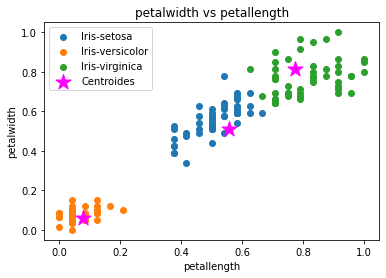

In [168]:
#Resultado de Cluster Normalizado

df0 = dataset[dataset.Cluster2==0]
df1 = dataset[dataset.Cluster2==1]
df2 = dataset[dataset.Cluster2==2]

plt.scatter(df0.petalwidth, df0.petallength, Label='Iris-setosa')
plt.scatter(df1.petalwidth, df1.petallength, Label='Iris-versicolor')
plt.scatter(df2.petalwidth, df2.petallength, Label='Iris-virginica')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('petalwidth vs petallength')
plt.xlabel('petallength')
plt.ylabel('petalwidth')
plt.legend()
plt.show()

# Elbow Plot (Petal)

In [169]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset[['petallength','petalwidth']])
    sse.append(km.inertia_)

C:\Users\PC NASUA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


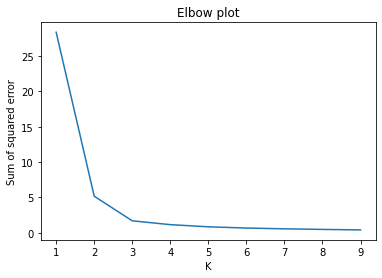

In [170]:
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

# Inicio de Punto 2 (Sepal)

In [171]:
dataset1




,sepallength,sepalwidth,petallength,petalwidth,nombre
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [172]:
dataset1 = dataset1.dropna()
print(dataset1.shape)

(150, 5)


In [173]:
#Do clustering with the iris flower dataset to form clusters using as features 
#sepal width and length. Drop out the other two features (petal width and 
#length) for simplicity.
# Drop out non necesary columns
dataset1.drop(['petallength', 'petalwidth'],axis='columns',inplace=True)

#Visualize the dataset
dataset1




,sepallength,sepalwidth,nombre
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


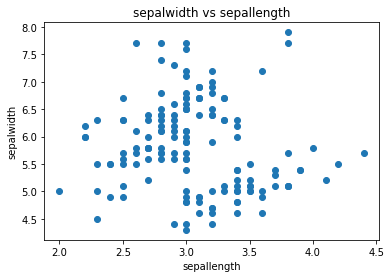

In [174]:
plt.scatter(dataset1.sepalwidth,dataset1.sepallength)
plt.title('sepalwidth vs sepallength')
plt.xlabel('sepallength')
plt.ylabel('sepalwidth')
plt.show()

<ipython-input-175-fbfd45aca083>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(d1f0.sepalwidth, d1f0.sepallength, Label='Iris-setosa')
<ipython-input-175-fbfd45aca083>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(d1f1.sepalwidth, d1f1.sepallength, Label='Iris-versicolor')
<ipython-input-175-fbfd45aca083>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(d1f2.sepalwidth, d1f2.sepallength, Label='Iris-virginica')


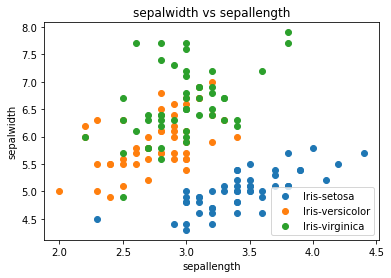

In [175]:
d1f0 = dataset1[dataset1.nombre==0]
d1f1 = dataset1[dataset1.nombre==1]
d1f2 = dataset1[dataset1.nombre==2]

plt.scatter(d1f0.sepalwidth, d1f0.sepallength, Label='Iris-setosa')
plt.scatter(d1f1.sepalwidth, d1f1.sepallength, Label='Iris-versicolor')
plt.scatter(d1f2.sepalwidth, d1f2.sepallength, Label='Iris-virginica')

plt.title('sepalwidth vs sepallength')
plt.xlabel('sepallength')
plt.ylabel('sepalwidth')
plt.legend()
plt.show()

In [176]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset1[['sepalwidth','sepallength']])

# Print estimated cluster of each point in the dataser
yp

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [177]:
# Add a new column to the dataset with the cluster information
dataset1['Cluster1'] = yp

dataset1

,sepallength,sepalwidth,nombre,Cluster1
0,5.1,3.5,0,2
1,4.9,3.0,0,2
2,4.7,3.2,0,2
3,4.6,3.1,0,2
4,5.0,3.6,0,2
...,...,...,...,...
145,6.7,3.0,2,1
146,6.3,2.5,2,0
147,6.5,3.0,2,1
148,6.2,3.4,2,1


In [178]:
dataset1.Cluster1.unique()

array([2, 1, 0])

In [179]:
# ...
km.cluster_centers_

array([[2.69245283, 5.77358491],
       [3.07446809, 6.81276596],
       [3.428     , 5.006     ]])

In [180]:
km.inertia_

37.0507021276596

<ipython-input-181-e7d51ee13092>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(d1f0.sepalwidth, d1f0.sepallength, Label='Iris-setosa')
<ipython-input-181-e7d51ee13092>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(d1f1.sepalwidth, d1f1.sepallength, Label='Iris-versicolor')
<ipython-input-181-e7d51ee13092>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(d1f2.sepalwidth, d1f2.sepallength, Label='Iris-virginica')


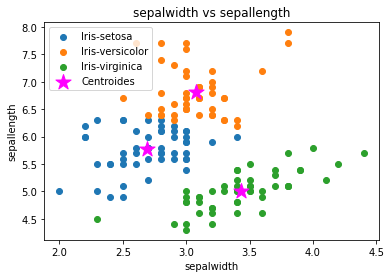

In [181]:
#Resultado de Cluster 2
d1f0 = dataset1[dataset1.Cluster1==0]
d1f1 = dataset1[dataset1.Cluster1==1]
d1f2 = dataset1[dataset1.Cluster1==2]

plt.scatter(d1f0.sepalwidth, d1f0.sepallength, Label='Iris-setosa')
plt.scatter(d1f1.sepalwidth, d1f1.sepallength, Label='Iris-versicolor')
plt.scatter(d1f2.sepalwidth, d1f2.sepallength, Label='Iris-virginica')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('sepalwidth vs sepallength')
plt.xlabel('sepalwidth')
plt.ylabel('sepallength')
plt.legend()
plt.show()

# Normalizing the data: sepalwidth vs sepallength

Normalizing the data: preprocessing using min max scaler

In [182]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(dataset1[['sepallength']])
dataset1['sepallength'] = scaler.transform(dataset1[['sepallength']])

scaler.fit(dataset1[['sepalwidth']])
dataset1['sepalwidth'] = scaler.transform(dataset1[['sepalwidth']])

dataset1

,sepallength,sepalwidth,nombre,Cluster1
0,0.222222,0.625000,0,2
1,0.166667,0.416667,0,2
2,0.111111,0.500000,0,2
3,0.083333,0.458333,0,2
4,0.194444,0.666667,0,2
...,...,...,...,...
145,0.666667,0.416667,2,1
146,0.555556,0.208333,2,0
147,0.611111,0.416667,2,1
148,0.527778,0.583333,2,1


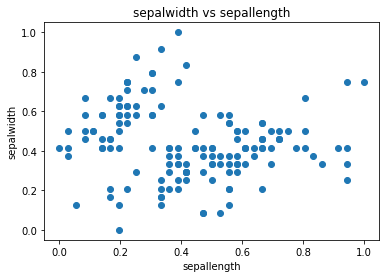

In [183]:
plt.scatter(dataset1.sepallength,dataset1.sepalwidth)
plt.title('sepalwidth vs sepallength')
plt.xlabel('sepallength')
plt.ylabel('sepalwidth')
plt.show()

In [184]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset1[['sepalwidth','sepallength']])

# Print estimated cluster of each point in the dataser
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [185]:
# Add a new column to the dataset with the cluster information
dataset1['Cluster2'] = yp

dataset1

,sepallength,sepalwidth,nombre,Cluster1,Cluster2
0,0.222222,0.625000,0,2,1
1,0.166667,0.416667,0,2,1
2,0.111111,0.500000,0,2,1
3,0.083333,0.458333,0,2,1
4,0.194444,0.666667,0,2,1
...,...,...,...,...,...
145,0.666667,0.416667,2,1,0
146,0.555556,0.208333,2,0,2
147,0.611111,0.416667,2,1,0
148,0.527778,0.583333,2,1,0


<ipython-input-186-d29195a871a0>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df0.sepalwidth, df0.sepallength, Label='Iris-setosa')
<ipython-input-186-d29195a871a0>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.sepalwidth, df1.sepallength, Label='Iris-versicolor')
<ipython-input-186-d29195a871a0>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.sepalwidth, df2.sepallength, Label='Iris-virginica')


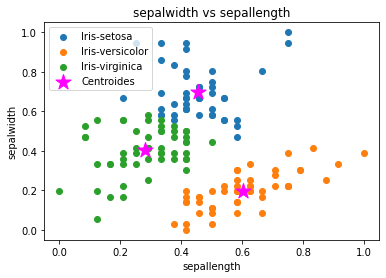

In [186]:
#Resultado de Cluster Normalizado

df0 = dataset1[dataset1.Cluster2==0]
df1 = dataset1[dataset1.Cluster2==1]
df2 = dataset1[dataset1.Cluster2==2]

plt.scatter(df0.sepalwidth, df0.sepallength, Label='Iris-setosa')
plt.scatter(df1.sepalwidth, df1.sepallength, Label='Iris-versicolor')
plt.scatter(df2.sepalwidth, df2.sepallength, Label='Iris-virginica')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('sepalwidth vs sepallength')
plt.xlabel('sepallength')
plt.ylabel('sepalwidth')
plt.legend()
plt.show()

# Elbow Plot (Petal)

In [187]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset1[['sepallength','sepalwidth']])
    sse.append(km.inertia_)

C:\Users\PC NASUA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


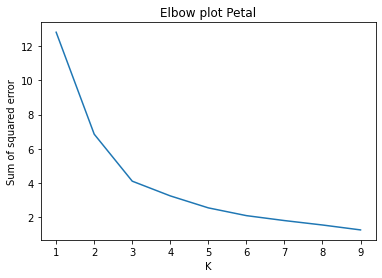

In [188]:
plt.plot(k_rng,sse)

plt.title('Elbow plot Petal')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

# Inicio de Punto 3 (All Features)

In [189]:
dataset2

,sepallength,sepalwidth,petallength,petalwidth,nombre
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [190]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset2[['petalwidth','petallength','sepallength','sepalwidth']])

# Print estimated cluster of each point in the dataser
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [191]:
# Add a new column to the dataset with the cluster information
dataset2['Cluster1'] = yp

dataset2

,sepallength,sepalwidth,petallength,petalwidth,nombre,Cluster1
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [192]:
dataset2.Cluster1.unique()

array([0, 1, 2])

In [193]:
# ...
km.cluster_centers_

array([[0.246     , 1.462     , 5.006     , 3.428     ],
       [1.43387097, 4.39354839, 5.9016129 , 2.7483871 ],
       [2.07105263, 5.74210526, 6.85      , 3.07368421]])

In [194]:
km.inertia_

78.851441426146

In [195]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(dataset2[['sepallength']])
dataset2['sepallength'] = scaler.transform(dataset2[['sepallength']])

scaler.fit(dataset2[['sepalwidth']])
dataset2['sepalwidth'] = scaler.transform(dataset2[['sepalwidth']])

scaler.fit(dataset2[['petallength']])
dataset2['petallength'] = scaler.transform(dataset2[['petallength']])

scaler.fit(dataset2[['petalwidth']])
dataset2['petalwidth'] = scaler.transform(dataset2[['petalwidth']])

dataset2

,sepallength,sepalwidth,petallength,petalwidth,nombre,Cluster1
0,0.222222,0.625000,0.067797,0.041667,0,0
1,0.166667,0.416667,0.067797,0.041667,0,0
2,0.111111,0.500000,0.050847,0.041667,0,0
3,0.083333,0.458333,0.084746,0.041667,0,0
4,0.194444,0.666667,0.067797,0.041667,0,0
...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2,2
146,0.555556,0.208333,0.677966,0.750000,2,1
147,0.611111,0.416667,0.711864,0.791667,2,2
148,0.527778,0.583333,0.745763,0.916667,2,2


In [196]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset2[['petalwidth','petallength','sepallength','sepalwidth']])

# Print estimated cluster of each point in the dataser
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [197]:
# Add a new column to the dataset with the cluster information
dataset2['Cluster2'] = yp

dataset2

,sepallength,sepalwidth,petallength,petalwidth,nombre,Cluster1,Cluster2
0,0.222222,0.625000,0.067797,0.041667,0,0,0
1,0.166667,0.416667,0.067797,0.041667,0,0,0
2,0.111111,0.500000,0.050847,0.041667,0,0,0
3,0.083333,0.458333,0.084746,0.041667,0,0,0
4,0.194444,0.666667,0.067797,0.041667,0,0,0
...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2,2,2
146,0.555556,0.208333,0.677966,0.750000,2,1,1
147,0.611111,0.416667,0.711864,0.791667,2,2,2
148,0.527778,0.583333,0.745763,0.916667,2,2,2


In [198]:
dataset2.Cluster2.unique()

array([0, 2, 1])

In [199]:
# ...
km.cluster_centers_

array([[0.06083333, 0.07830508, 0.19611111, 0.595     ],
       [0.54918033, 0.57571548, 0.44125683, 0.30737705],
       [0.82478632, 0.79704476, 0.70726496, 0.4508547 ]])

In [200]:
km.inertia_

6.982216473785234


# Questions

For the previous cases:
With and without using min max scaling: determine whether the scaling benefits or not 
Si da beneficio pero en algunos casos.

Compute and show the elbow plot

Draw conclusiones:


About the scalling: does it helps or not? 
Visualmente ayuda pero se puede decir que la diferencia es muy poca, entonces puede que no sea tan relevante el uso del scalling en este problema.


About the elbow plot: does the K agree with the real number of clusters?
Al realizar el analisis del elbow plot, la K si es el numero real de clusters necesitados ya que son 3 diferentes tipos de flores.

Comparison between (i) sepal features alone, (ii) petal features alone, and (ii) both sepal with petal features: which one is better/worse? Why?

La comparativa entre los resultados la mejor se puede decir que es el sepal y petal features alones, esto debido a que podemos hacer una comparación y ver visualmente las gráficas para apoyarnos con esos datos y verificar que los datos sean correctos.

El peor en mi opinión fue al juntar las comparativas ya que no podiamos graficarlo, aunque puede que tenga un mejor resultado.
